# 🌳 Interactive DFS (Depth-First Search) Tutorial

## 📚 How to Use This Notebook:

### 1️⃣ Installation (Run this first!):
```bash
pip install networkx matplotlib ipywidgets numpy
```

### 2️⃣ How to Navigate:
- **Run cells in order**: Press `Shift + Enter` to run each cell
- **Experiment**: Change the graph structures and see how DFS behaves
- **Interactive controls**: Use sliders and buttons to control animations
- **Restart**: `Kernel → Restart & Run All` to start fresh

### 3️⃣ What You'll Learn:
- ✅ How DFS traverses graphs
- ✅ Recursive vs Iterative DFS
- ✅ Path finding algorithms
- ✅ Real-world applications (maze solving)

### 4️⃣ Tips:
- Watch the **colors** in animations:
  - 🔵 **Blue** = Unvisited
  - 🟡 **Yellow** = Currently visiting
  - 🟢 **Green** = Visited
  - 🔴 **Red** = Path found
- Try modifying the graphs and re-running cells!

---

In [10]:
# Import required libraries
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed
import time
from collections import deque
import numpy as np

# Configure matplotlib for better display
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['animation.html'] = 'jshtml'

print("✅ All libraries imported successfully!")
print("\n🚀 Ready to explore DFS!")

✅ All libraries imported successfully!

🚀 Ready to explore DFS!


---
## 🎯 Part 1: Basic DFS Visualization

Let's start with a simple graph and see how DFS explores it!

In [11]:
class DFSVisualizer:
    def __init__(self, graph_dict):
        """
        Initialize the DFS visualizer with a graph dictionary.
        Example: {'A': ['B', 'C'], 'B': ['D'], ...}
        """
        self.graph_dict = graph_dict
        self.G = nx.DiGraph(graph_dict)
        self.pos = nx.spring_layout(self.G, seed=42)
        self.steps = []
        
    def dfs_record_steps(self, start):
        """Perform DFS and record each step for animation"""
        visited = set()
        stack = [start]
        self.steps = []
        
        while stack:
            node = stack.pop()
            
            if node not in visited:
                visited.add(node)
                self.steps.append({
                    'current': node,
                    'visited': visited.copy(),
                    'stack': stack.copy(),
                    'action': f'Visiting {node}'
                })
                
                # Add neighbors in reverse order
                for neighbor in reversed(self.graph_dict.get(node, [])):
                    if neighbor not in visited:
                        stack.append(neighbor)
        
        return self.steps
    
    def animate_dfs(self, start, interval=800):
        """Create an animated visualization of DFS"""
        self.dfs_record_steps(start)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        def update(frame):
            ax1.clear()
            ax2.clear()
            
            if frame >= len(self.steps):
                frame = len(self.steps) - 1
            
            step = self.steps[frame]
            current = step['current']
            visited = step['visited']
            stack = step['stack']
            
            # Graph visualization
            node_colors = []
            for node in self.G.nodes():
                if node == current:
                    node_colors.append('#FFD700')  # Yellow for current
                elif node in visited:
                    node_colors.append('#90EE90')  # Green for visited
                else:
                    node_colors.append('#87CEEB')  # Blue for unvisited
            
            nx.draw(self.G, self.pos, ax=ax1, with_labels=True, 
                   node_color=node_colors, node_size=2000, 
                   font_size=16, font_weight='bold',
                   edge_color='gray', arrows=True, 
                   arrowsize=20, arrowstyle='->')
            
            ax1.set_title(f'Step {frame + 1}/{len(self.steps)}: {step["action"]}', 
                         fontsize=14, fontweight='bold')
            
            # Stack visualization
            ax2.set_xlim(0, 10)
            ax2.set_ylim(0, max(10, len(stack) + 3))
            ax2.axis('off')
            
            # Draw stack
            ax2.text(5, max(10, len(stack) + 3) - 1, 'STACK (LIFO)', 
                    ha='center', fontsize=16, fontweight='bold')
            
            for i, item in enumerate(reversed(stack)):
                y_pos = i + 1
                rect = plt.Rectangle((3, y_pos - 0.4), 4, 0.8, 
                                    facecolor='lightblue', 
                                    edgecolor='black', linewidth=2)
                ax2.add_patch(rect)
                ax2.text(5, y_pos, str(item), ha='center', va='center', 
                        fontsize=14, fontweight='bold')
            
            # Show visited nodes
            visited_text = f"Visited: {sorted(visited)}"
            ax2.text(5, 0.5, visited_text, ha='center', fontsize=12,
                    bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
            
            # Legend
            legend_elements = [
                plt.Line2D([0], [0], marker='o', color='w', 
                          markerfacecolor='#FFD700', markersize=10, label='Current'),
                plt.Line2D([0], [0], marker='o', color='w', 
                          markerfacecolor='#90EE90', markersize=10, label='Visited'),
                plt.Line2D([0], [0], marker='o', color='w', 
                          markerfacecolor='#87CEEB', markersize=10, label='Unvisited')
            ]
            ax1.legend(handles=legend_elements, loc='upper right')
        
        anim = FuncAnimation(fig, update, frames=len(self.steps), 
                           interval=interval, repeat=True)
        plt.close()
        return HTML(anim.to_jshtml())

print("✅ DFS Visualizer class created!")

✅ DFS Visualizer class created!


### 🎮 Try it: Simple Graph

**📝 Instructions:**
1. Run the cell below to see DFS in action
2. Watch how the yellow node (current) moves through the graph
3. Notice how the stack changes (right panel)
4. **Try modifying the graph** - change connections and see what happens!

In [12]:
# EXPERIMENT HERE: Change this graph structure!
# Try adding/removing nodes or changing connections
simple_graph = {
    'A': ['B', 'C','H'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

# Create visualizer and animate
viz = DFSVisualizer(simple_graph)
viz.animate_dfs('A', interval=1000)  # Change interval to speed up/slow down

---
## 🔄 Part 2: Interactive Graph Builder

Build your own graph interactively!

In [13]:
def create_custom_graph(num_nodes=6, edge_prob=0.3, seed=42):
    """
    Create a random graph with interactive parameters.
    
    Parameters:
    - num_nodes: Number of nodes in the graph (3-15)
    - edge_prob: Probability of edge between nodes (0.0-1.0)
    - seed: Random seed for reproducibility
    """
    np.random.seed(seed)
    nodes = [chr(65 + i) for i in range(num_nodes)]  # A, B, C, ...
    
    graph = {node: [] for node in nodes}
    
    for i, node in enumerate(nodes):
        # Connect to later nodes to avoid cycles in simple cases
        for j in range(i + 1, num_nodes):
            if np.random.random() < edge_prob:
                graph[node].append(nodes[j])
    
    # Visualize the created graph
    print(f"\n📊 Generated graph with {num_nodes} nodes:")
    for node, neighbors in graph.items():
        print(f"  {node} → {neighbors}")
    
    viz = DFSVisualizer(graph)
    return viz.animate_dfs('A', interval=1000)

# Interactive widget
interact(create_custom_graph,
         num_nodes=widgets.IntSlider(min=3, max=15, step=1, value=6, description='Nodes:'),
         edge_prob=widgets.FloatSlider(min=0.0, max=1.0, step=0.1, value=0.3, description='Edge Prob:'),
         seed=widgets.IntSlider(min=1, max=100, step=1, value=42, description='Random Seed:'));

interactive(children=(IntSlider(value=6, description='Nodes:', max=15, min=3), FloatSlider(value=0.3, descript…

---
## 🎯 Part 3: DFS vs BFS Comparison

See the difference between DFS and BFS side-by-side!

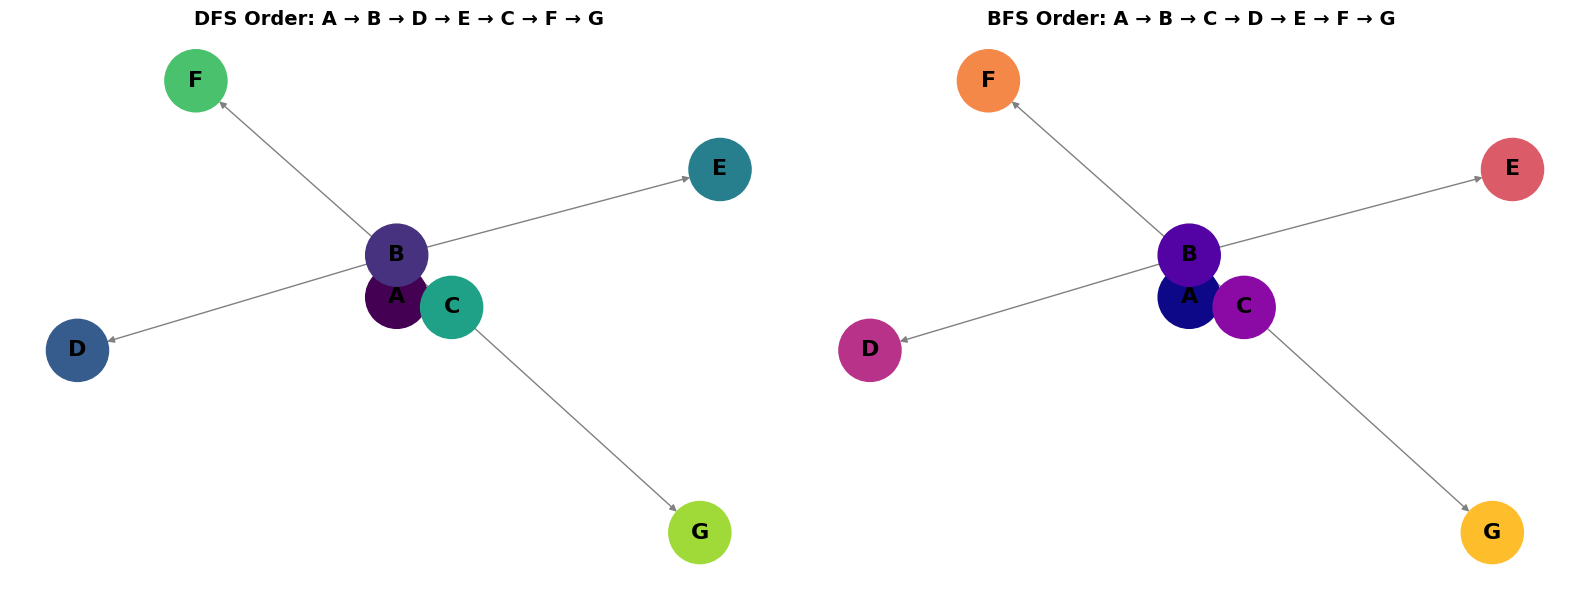


📊 Key Differences:
  DFS: A → B → D → E → C → F → G (Goes DEEP first)
  BFS: A → B → C → D → E → F → G (Goes WIDE first)

  Same order? False


In [14]:
class DFSvsBFS:
    def __init__(self, graph_dict):
        self.graph_dict = graph_dict
        self.G = nx.DiGraph(graph_dict)
        self.pos = nx.spring_layout(self.G, seed=42)
    
    def get_traversal_order(self, start, method='dfs'):
        """Get traversal order for DFS or BFS"""
        visited = set()
        order = []
        
        if method == 'dfs':
            stack = [start]
            while stack:
                node = stack.pop()
                if node not in visited:
                    visited.add(node)
                    order.append(node)
                    for neighbor in reversed(self.graph_dict.get(node, [])):
                        if neighbor not in visited:
                            stack.append(neighbor)
        else:  # bfs
            queue = deque([start])
            visited.add(start)
            while queue:
                node = queue.popleft()
                order.append(node)
                for neighbor in self.graph_dict.get(node, []):
                    if neighbor not in visited:
                        visited.add(neighbor)
                        queue.append(neighbor)
        
        return order
    
    def compare(self, start):
        """Compare DFS and BFS visually"""
        dfs_order = self.get_traversal_order(start, 'dfs')
        bfs_order = self.get_traversal_order(start, 'bfs')
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # DFS
        node_colors_dfs = [plt.cm.viridis(i/len(dfs_order)) 
                          for i, _ in enumerate(dfs_order)]
        color_map_dfs = {node: node_colors_dfs[i] 
                        for i, node in enumerate(dfs_order)}
        colors_dfs = [color_map_dfs.get(node, 'lightblue') 
                     for node in self.G.nodes()]
        
        nx.draw(self.G, self.pos, ax=ax1, with_labels=True,
               node_color=colors_dfs, node_size=2000,
               font_size=16, font_weight='bold',
               edge_color='gray', arrows=True)
        ax1.set_title(f'DFS Order: {" → ".join(dfs_order)}', 
                     fontsize=14, fontweight='bold')
        
        # BFS
        node_colors_bfs = [plt.cm.plasma(i/len(bfs_order)) 
                          for i, _ in enumerate(bfs_order)]
        color_map_bfs = {node: node_colors_bfs[i] 
                        for i, node in enumerate(bfs_order)}
        colors_bfs = [color_map_bfs.get(node, 'lightblue') 
                     for node in self.G.nodes()]
        
        nx.draw(self.G, self.pos, ax=ax2, with_labels=True,
               node_color=colors_bfs, node_size=2000,
               font_size=16, font_weight='bold',
               edge_color='gray', arrows=True)
        ax2.set_title(f'BFS Order: {" → ".join(bfs_order)}', 
                     fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        print("\n📊 Key Differences:")
        print(f"  DFS: {' → '.join(dfs_order)} (Goes DEEP first)")
        print(f"  BFS: {' → '.join(bfs_order)} (Goes WIDE first)")
        print(f"\n  Same order? {dfs_order == bfs_order}")

# Test it
comparison_graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': [],
    'E': [],
    'F': [],
    'G': []
}

comparator = DFSvsBFS(comparison_graph)
comparator.compare('A')

---
## 🗺️ Part 4: Path Finding with DFS

Find paths between two nodes!


🎯 Finding a path from A to G:
✅ Path found: A → B → D → G


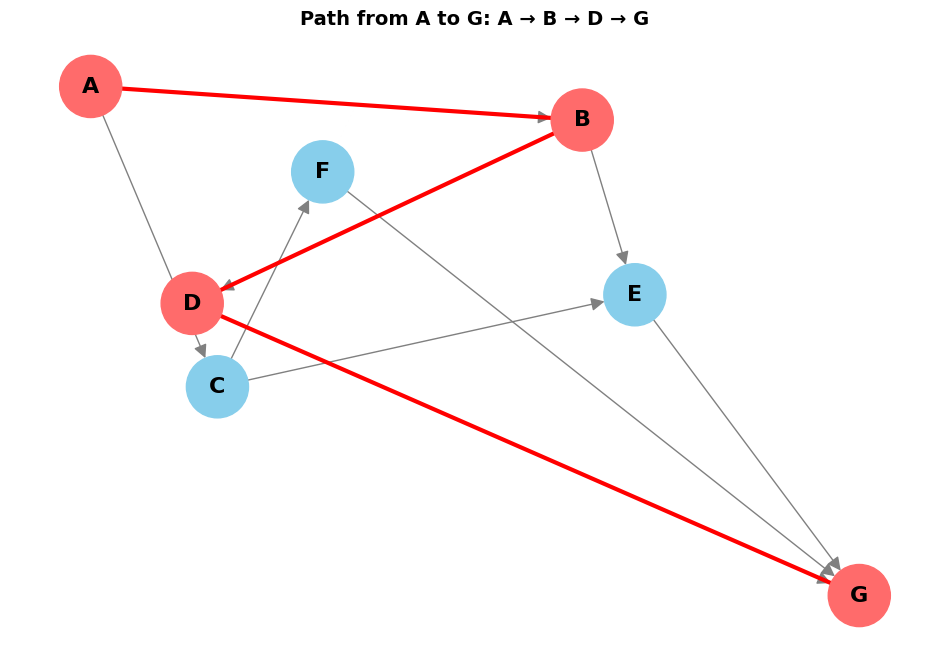


🎯 Finding ALL paths from A to G:

✅ Found 4 path(s) from A to G:
  Path 1: A → B → D → G
  Path 2: A → B → E → G
  Path 3: A → C → E → G
  Path 4: A → C → F → G


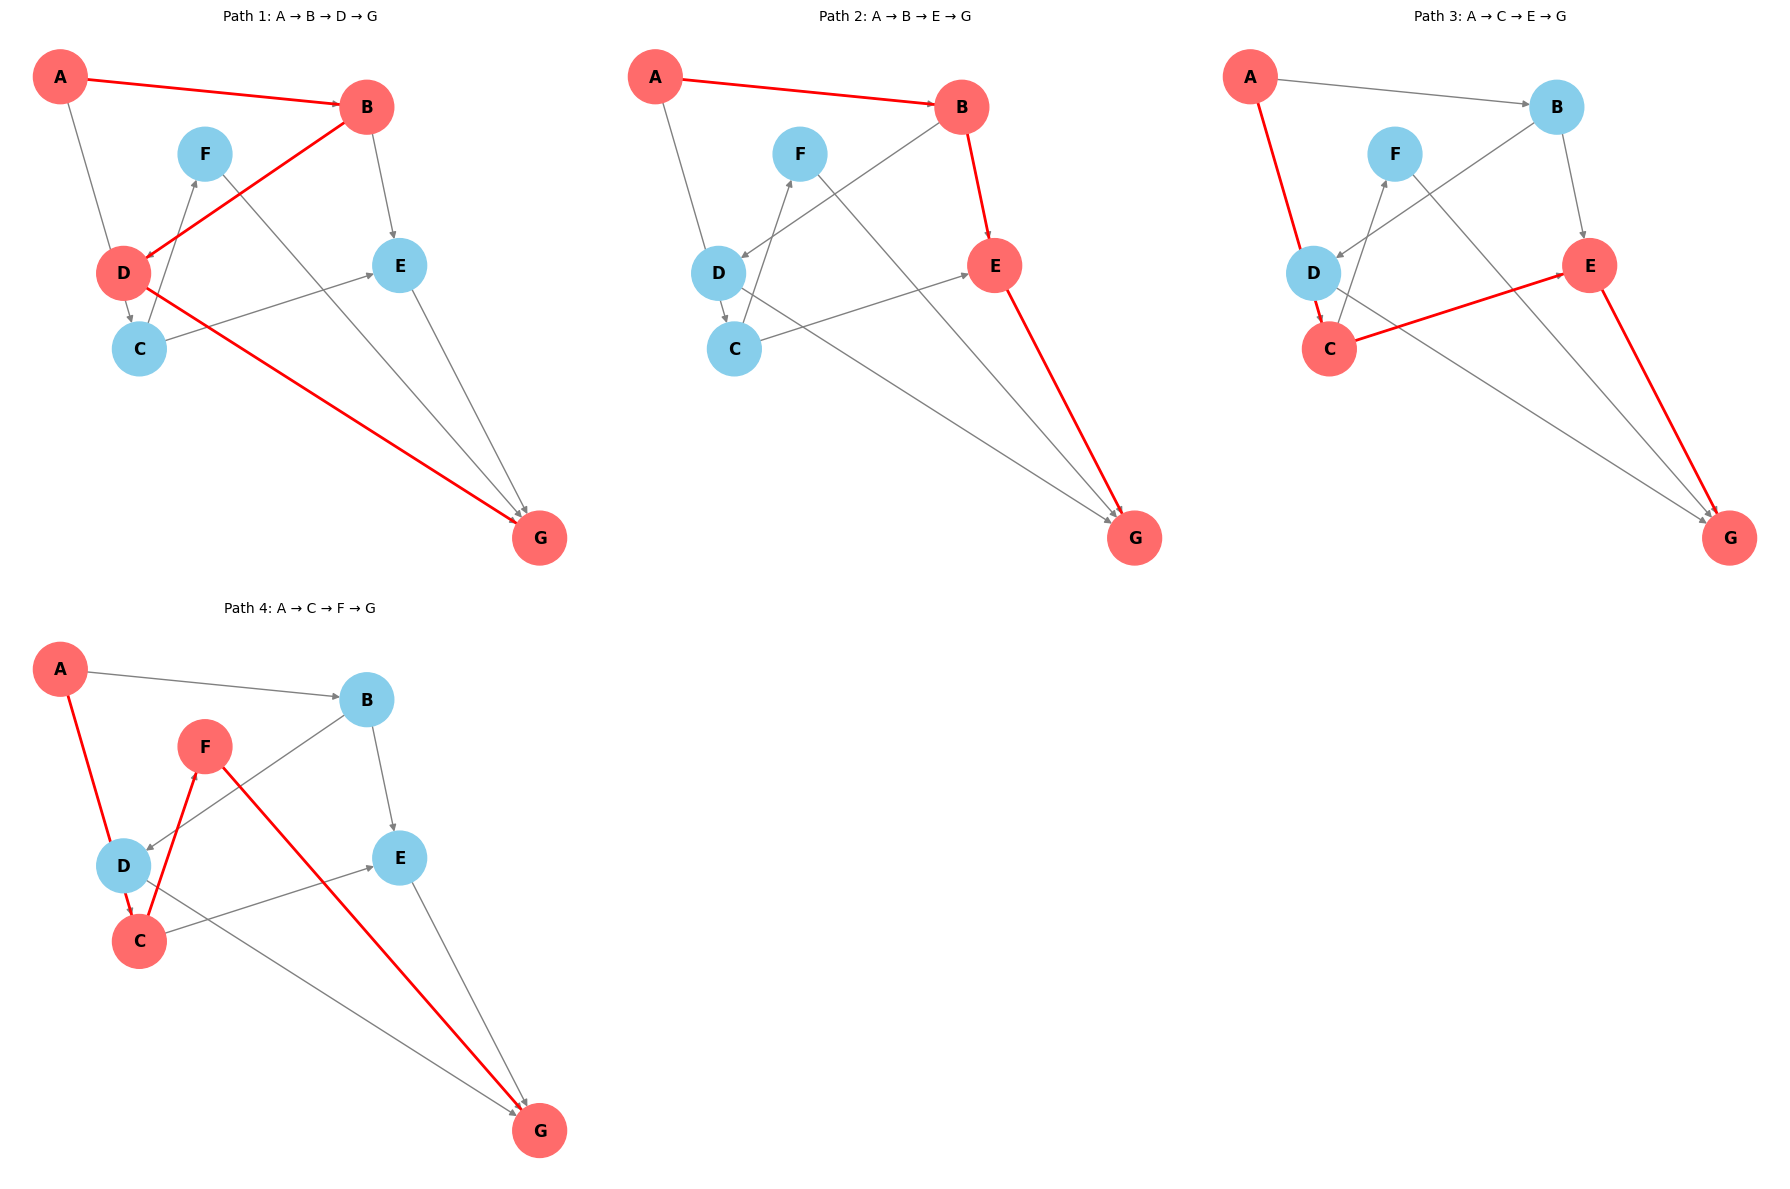

In [15]:
class PathFinder:
    def __init__(self, graph_dict):
        self.graph_dict = graph_dict
        self.G = nx.DiGraph(graph_dict)
        self.pos = nx.spring_layout(self.G, seed=42)
    
    def find_path(self, start, goal, path=None):
        """Find a path from start to goal using DFS"""
        if path is None:
            path = []
        
        path = path + [start]
        
        if start == goal:
            return path
        
        for neighbor in self.graph_dict.get(start, []):
            if neighbor not in path:
                new_path = self.find_path(neighbor, goal, path)
                if new_path:
                    return new_path
        
        return None
    
    def find_all_paths(self, start, goal, path=None, all_paths=None):
        """Find all paths from start to goal"""
        if path is None:
            path = []
        if all_paths is None:
            all_paths = []
        
        path = path + [start]
        
        if start == goal:
            all_paths.append(path)
        else:
            for neighbor in self.graph_dict.get(start, []):
                if neighbor not in path:
                    self.find_all_paths(neighbor, goal, path, all_paths)
        
        return all_paths
    
    def visualize_path(self, start, goal):
        """Visualize a single path"""
        path = self.find_path(start, goal)
        
        fig, ax = plt.subplots(figsize=(12, 8))
        
        if path:
            # Color nodes in path
            node_colors = ['#FF6B6B' if node in path else '#87CEEB' 
                          for node in self.G.nodes()]
            
            # Draw graph
            nx.draw(self.G, self.pos, ax=ax, with_labels=True,
                   node_color=node_colors, node_size=2000,
                   font_size=16, font_weight='bold',
                   edge_color='gray', arrows=True, arrowsize=20)
            
            # Highlight path edges
            path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
            nx.draw_networkx_edges(self.G, self.pos, path_edges,
                                  edge_color='red', width=3, ax=ax)
            
            ax.set_title(f'Path from {start} to {goal}: {" → ".join(path)}',
                        fontsize=14, fontweight='bold')
            print(f"✅ Path found: {' → '.join(path)}")
        else:
            nx.draw(self.G, self.pos, ax=ax, with_labels=True,
                   node_color='#87CEEB', node_size=2000,
                   font_size=16, font_weight='bold',
                   edge_color='gray', arrows=True)
            ax.set_title(f'No path from {start} to {goal}',
                        fontsize=14, fontweight='bold')
            print(f"❌ No path found from {start} to {goal}")
        
        plt.show()
    
    def visualize_all_paths(self, start, goal):
        """Visualize all paths"""
        all_paths = self.find_all_paths(start, goal)
        
        if not all_paths:
            print(f"❌ No paths found from {start} to {goal}")
            return
        
        print(f"\n✅ Found {len(all_paths)} path(s) from {start} to {goal}:")
        for i, path in enumerate(all_paths, 1):
            print(f"  Path {i}: {' → '.join(path)}")
        
        # Visualize each path
        num_paths = len(all_paths)
        cols = min(3, num_paths)
        rows = (num_paths + cols - 1) // cols
        
        fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 6*rows))
        if num_paths == 1:
            axes = [axes]
        else:
            axes = axes.flatten() if rows > 1 else axes
        
        for i, (ax, path) in enumerate(zip(axes, all_paths)):
            node_colors = ['#FF6B6B' if node in path else '#87CEEB' 
                          for node in self.G.nodes()]
            
            nx.draw(self.G, self.pos, ax=ax, with_labels=True,
                   node_color=node_colors, node_size=1500,
                   font_size=12, font_weight='bold',
                   edge_color='gray', arrows=True)
            
            path_edges = [(path[j], path[j+1]) for j in range(len(path)-1)]
            nx.draw_networkx_edges(self.G, self.pos, path_edges,
                                  edge_color='red', width=2, ax=ax)
            
            ax.set_title(f'Path {i+1}: {" → ".join(path)}', fontsize=10)
        
        # Hide extra subplots
        for i in range(num_paths, len(axes)):
            axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()

# Example graph with multiple paths
path_graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['E', 'F'],
    'D': ['G'],
    'E': ['G'],
    'F': ['G'],
    'G': []
}

pf = PathFinder(path_graph)

# Find and visualize single path
print("\n🎯 Finding a path from A to G:")
pf.visualize_path('A', 'G')

# Find and visualize all paths
print("\n🎯 Finding ALL paths from A to G:")
pf.visualize_all_paths('A', 'G')

### 🎮 Interactive Path Finder

Try finding paths between different nodes!

In [16]:
def interactive_path_finder(start_node, end_node, show_all=False):
    """
    Interactive path finder
    
    Parameters:
    - start_node: Starting node
    - end_node: Destination node
    - show_all: Show all paths (True) or just one (False)
    """
    if show_all:
        pf.visualize_all_paths(start_node, end_node)
    else:
        pf.visualize_path(start_node, end_node)

# Get all nodes for dropdown
nodes = list(path_graph.keys())

interact(interactive_path_finder,
         start_node=widgets.Dropdown(options=nodes, value='A', description='Start:'),
         end_node=widgets.Dropdown(options=nodes, value='G', description='End:'),
         show_all=widgets.Checkbox(value=False, description='Show all paths'));

interactive(children=(Dropdown(description='Start:', options=('A', 'B', 'C', 'D', 'E', 'F', 'G'), value='A'), …

---
## 🏰 Part 5: Maze Solver with DFS

The ultimate test - solving a maze!

In [17]:
class MazeSolver:
    def __init__(self, maze):
        """
        Initialize maze solver.
        0 = path, 1 = wall
        """
        self.maze = np.array(maze)
        self.rows, self.cols = self.maze.shape
        self.steps = []
    
    def solve(self, start, end):
        """Solve maze using DFS and record steps"""
        self.steps = []
        visited = set()
        
        def dfs(x, y, path):
            # Record step
            self.steps.append({
                'current': (x, y),
                'path': path.copy(),
                'visited': visited.copy()
            })
            
            # Base cases
            if (x, y) == end:
                return path + [(x, y)]
            
            if (x < 0 or x >= self.rows or y < 0 or y >= self.cols or
                self.maze[x, y] == 1 or (x, y) in visited):
                return None
            
            visited.add((x, y))
            
            # Try all 4 directions: right, down, left, up
            directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
            for dx, dy in directions:
                result = dfs(x + dx, y + dy, path + [(x, y)])
                if result:
                    return result
            
            return None
        
        solution = dfs(start[0], start[1], [])
        return solution
    
    def animate_solution(self, start, end, interval=300):
        """Animate the maze solving process"""
        solution = self.solve(start, end)
        
        fig, ax = plt.subplots(figsize=(10, 10))
        
        def update(frame):
            ax.clear()
            
            if frame >= len(self.steps):
                frame = len(self.steps) - 1
            
            step = self.steps[frame]
            current = step['current']
            path = step['path']
            visited = step['visited']
            
            # Create colored maze
            display_maze = np.ones((self.rows, self.cols, 3))
            
            for i in range(self.rows):
                for j in range(self.cols):
                    if self.maze[i, j] == 1:
                        display_maze[i, j] = [0.2, 0.2, 0.2]  # Wall - dark gray
                    elif (i, j) in visited:
                        display_maze[i, j] = [0.8, 0.8, 1.0]  # Visited - light blue
                    else:
                        display_maze[i, j] = [1.0, 1.0, 1.0]  # Unvisited - white
            
            # Color the current path
            for pos in path:
                display_maze[pos[0], pos[1]] = [1.0, 0.8, 0.0]  # Path - orange
            
            # Current position
            display_maze[current[0], current[1]] = [1.0, 0.0, 0.0]  # Current - red
            
            # Start and end
            display_maze[start[0], start[1]] = [0.0, 1.0, 0.0]  # Start - green
            display_maze[end[0], end[1]] = [0.0, 0.0, 1.0]  # End - blue
            
            ax.imshow(display_maze)
            ax.set_title(f'Step {frame + 1}/{len(self.steps)} - Current: {current}',
                        fontsize=14, fontweight='bold')
            ax.grid(True, alpha=0.3)
            ax.set_xticks(range(self.cols))
            ax.set_yticks(range(self.rows))
            
            # Legend
            legend_elements = [
                plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='green',
                          markersize=10, label='Start'),
                plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='blue',
                          markersize=10, label='End'),
                plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='red',
                          markersize=10, label='Current'),
                plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='orange',
                          markersize=10, label='Path'),
                plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='lightblue',
                          markersize=10, label='Visited'),
                plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='gray',
                          markersize=10, label='Wall')
            ]
            ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.3, 1))
        
        anim = FuncAnimation(fig, update, frames=len(self.steps),
                           interval=interval, repeat=True)
        plt.close()
        
        if solution:
            print(f"\n✅ Solution found! Length: {len(solution)} steps")
            print(f"Path: {solution[:5]}...{solution[-5:] if len(solution) > 10 else ''}")
        else:
            print("\n❌ No solution found!")
        
        return HTML(anim.to_jshtml())

# Create a maze (0 = path, 1 = wall)
maze = [
    [0, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]
]

solver = MazeSolver(maze)
solver.animate_solution((0, 0), (6, 6), interval=400)


✅ Solution found! Length: 13 steps
Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2)]...[(4, 4), (4, 5), (4, 6), (5, 6), (6, 6)]


IndexError: index 7 is out of bounds for axis 1 with size 7

### 🎮 Create Your Own Maze!

Modify the maze and solve it!

In [ ]:
def create_random_maze(size=10, wall_prob=0.25, seed=42):
    """
    Create a random maze.
    
    Parameters:
    - size: Size of the maze (size x size)
    - wall_prob: Probability of a cell being a wall
    - seed: Random seed
    """
    np.random.seed(seed)
    maze = (np.random.random((size, size)) < wall_prob).astype(int)
    
    # Ensure start and end are clear
    maze[0, 0] = 0
    maze[size-1, size-1] = 0
    
    solver = MazeSolver(maze)
    return solver.animate_solution((0, 0), (size-1, size-1), interval=200)

interact(create_random_maze,
         size=widgets.IntSlider(min=5, max=20, step=1, value=10, description='Size:'),
         wall_prob=widgets.FloatSlider(min=0.0, max=0.5, step=0.05, value=0.25, 
                                      description='Wall %:'),
         seed=widgets.IntSlider(min=1, max=100, step=1, value=42, 
                               description='Random:'));

NameError: name 'interact' is not defined

---
## 📝 Part 6: Code Implementation Reference

Here are the core DFS implementations you can copy and use!

In [ ]:
# ===== RECURSIVE DFS =====
def dfs_recursive(graph, node, visited=None):
    """
    Simple recursive DFS implementation.
    Time: O(V + E), Space: O(V)
    """
    if visited is None:
        visited = set()
    
    visited.add(node)
    print(node, end=' ')
    
    for neighbor in graph.get(node, []):
        if neighbor not in visited:
            dfs_recursive(graph, neighbor, visited)
    
    return visited


# ===== ITERATIVE DFS =====
def dfs_iterative(graph, start):
    """
    Iterative DFS using stack.
    Time: O(V + E), Space: O(V)
    """
    visited = set()
    stack = [start]
    
    while stack:
        node = stack.pop()  # LIFO - Last In First Out
        
        if node not in visited:
            visited.add(node)
            print(node, end=' ')
            
            # Add neighbors in reverse to match recursive order
            for neighbor in reversed(graph.get(node, [])):
                if neighbor not in visited:
                    stack.append(neighbor)
    
    return visited


# ===== FIND A PATH =====
def dfs_find_path(graph, start, goal, path=None):
    """
    Find a path from start to goal.
    Returns the path if found, None otherwise.
    """
    if path is None:
        path = []
    
    path = path + [start]
    
    if start == goal:
        return path
    
    for neighbor in graph.get(start, []):
        if neighbor not in path:
            new_path = dfs_find_path(graph, neighbor, goal, path)
            if new_path:
                return new_path
    
    return None


# ===== FIND ALL PATHS =====
def dfs_all_paths(graph, start, goal, path=None, all_paths=None):
    """
    Find all paths from start to goal.
    Returns list of all paths.
    """
    if path is None:
        path = []
    if all_paths is None:
        all_paths = []
    
    path = path + [start]
    
    if start == goal:
        all_paths.append(path)
    else:
        for neighbor in graph.get(start, []):
            if neighbor not in path:
                dfs_all_paths(graph, neighbor, goal, path, all_paths)
    
    return all_paths


# Test all implementations
test_graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

print("\n" + "="*50)
print("Testing DFS Implementations")
print("="*50)

print("\n1. Recursive DFS:")
dfs_recursive(test_graph, 'A')

print("\n\n2. Iterative DFS:")
dfs_iterative(test_graph, 'A')

print("\n\n3. Find Path (A → F):")
path = dfs_find_path(test_graph, 'A', 'F')
print(f"Path: {' → '.join(path)}")

print("\n4. Find All Paths (A → F):")
all_paths = dfs_all_paths(test_graph, 'A', 'F')
for i, p in enumerate(all_paths, 1):
    print(f"  Path {i}: {' → '.join(p)}")

print("\n" + "="*50)

---
## 🎓 Summary & Key Takeaways

### What is DFS?
- **Depth-First Search** explores a graph by going as **deep** as possible before backtracking
- Uses a **stack** (LIFO - Last In First Out)
- Can be implemented **recursively** or **iteratively**

### When to Use DFS?
✅ **Good for:**
- Finding paths
- Detecting cycles
- Topological sorting
- Solving mazes/puzzles
- Tree traversals

❌ **Not ideal for:**
- Finding shortest path (use BFS instead)
- Very deep graphs (risk of stack overflow)

### Time & Space Complexity
- **Time**: O(V + E) where V = vertices, E = edges
- **Space**: O(V) for visited set + O(h) for recursion stack (h = height)

### DFS vs BFS Quick Comparison

| Feature | DFS | BFS |
|---------|-----|-----|
| Data Structure | Stack (LIFO) | Queue (FIFO) |
| Strategy | Go deep first | Go wide first |
| Shortest Path | ❌ No | ✅ Yes |
| Space | O(height) | O(width) |
| Use Case | Paths, cycles | Shortest path |

---

## 🚀 Next Steps

Now that you understand DFS, try:
1. **Modify the graphs** in earlier cells
2. **Create your own maze** and solve it
3. **Compare DFS vs BFS** on different graph structures
4. **Implement cycle detection** using DFS
5. **Try topological sorting** (for directed acyclic graphs)

### 💡 Practice Problems
- Number of Islands (LeetCode #200)
- Clone Graph (LeetCode #133)
- Course Schedule (LeetCode #207)
- Word Search (LeetCode #79)

---

## 📖 Additional Resources
- [GeeksforGeeks DFS](https://www.geeksforgeeks.org/depth-first-search-or-dfs-for-a-graph/)
- [Visualgo - Graph Traversal](https://visualgo.net/en/dfsbfs)
- [LeetCode - DFS Problems](https://leetcode.com/tag/depth-first-search/)

---

**Happy Learning! 🎉**

*Remember: The best way to learn is by doing. Modify the code, break things, and experiment!*